# Create plots for Figure 11

In [1]:
# Import necessary libraries
from __future__ import division, print_function, unicode_literals

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import tensorflow as tf
import numpy as np
from functools import partial
import glob, os
import pickle
import copy
from PDEsolvers import Burgers_Periodic

In [2]:
# User inputs
data_name = 'Burgers_Eqn_exp28'  # Prefix of data files

In [3]:
# Find the model with lowest validation error
import math

def BestErrorFile(folder_name):

    filename_best = ''
    best_error = 10**6

    current_dir = os.getcwd()
    os.chdir("./" + folder_name)
    for file in glob.glob("*.pkl"):
        with open(file, 'rb') as f:
            params = pickle.load(f)
            if not math.isnan(params['minRegTest']):
                if params['minRegTest'] < best_error:
                    filename_best = file
                    best_error = params['minRegTest']
    os.chdir(current_dir)

    return filename_best

In [4]:
# Create numpy arrays with data

# Use these lines to load all data
data_test1 = np.load(('./data/%s_test1_x.npy' % data_name))
data_test2 = np.load(('./data/%s_test2_x.npy' % data_name))
data_test3 = np.load(('./data/%s_test3_x.npy' % data_name))
data_test4 = np.load(('./data/%s_test4_x.npy' % data_name))
data_test5 = np.load(('./data/%s_test5_x.npy' % data_name))


In [5]:
import helperfns

max_shifts_to_stack = 50
data_test1_tensor = helperfns.stack_data(data_test1, max_shifts_to_stack, 51)
data_test2_tensor = helperfns.stack_data(data_test2, max_shifts_to_stack, 51)
data_test3_tensor = helperfns.stack_data(data_test3, max_shifts_to_stack, 51)
data_test4_tensor = helperfns.stack_data(data_test4, max_shifts_to_stack, 51)
data_test5_tensor = helperfns.stack_data(data_test5, max_shifts_to_stack, 51)

INFO:tensorflow:Restoring parameters from ./Burgers_exp28rr/Burgers_Eqn_exp28_2019_10_30_12_36_21_007819_model.ckpt
INFO:tensorflow:Restoring parameters from ./Burgers_exp30e/Burgers_Eqn_exp30_2019_10_31_06_23_27_317592_model.ckpt
INFO:tensorflow:Restoring parameters from ./Burgers_exp32e/Burgers_Eqn_exp32_2019_10_31_06_23_48_503042_model.ckpt


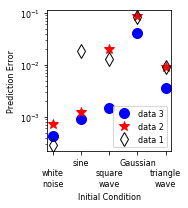

In [6]:
x_vals = np.arange(5)
line_styles = ["ob","*r","dk"]
fill_styles = ['full','full','none']
folder_names = ['Burgers_exp28rr/','Burgers_exp30e/','Burgers_exp32e/']

plt.figure(figsize=(2.7,3))
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.yscale("log")

lines = []
for k in range(3):
    folder_name = folder_names[k]  # Folder to be created for saved output
    pkl_file = folder_name + BestErrorFile(folder_name)
    
    with open(pkl_file, 'rb') as f:
        params = pickle.load(f)
    
    tf.reset_default_graph()
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(params['model_path']+'.meta')
        saver.restore(sess, params['model_path'])
    
        test1_loss = sess.run("loss2:0", feed_dict={"x:0": data_test1_tensor})
        test2_loss = sess.run("loss2:0", feed_dict={"x:0": data_test2_tensor})
        test3_loss = sess.run("loss2:0", feed_dict={"x:0": data_test3_tensor})
        test4_loss = sess.run("loss2:0", feed_dict={"x:0": data_test4_tensor})
        test5_loss = sess.run("loss2:0", feed_dict={"x:0": data_test5_tensor})
        
        
    y_vals = np.array([test1_loss, test2_loss, test3_loss, test4_loss, test5_loss])

    lines += plt.plot(x_vals,y_vals,line_styles[k],fillstyle=fill_styles[k],markersize=10)
    
plt.xticks(x_vals, ['\nwhite\nnoise','sine','\nsquare\nwave','Gaussian','\ntriangle\nwave'])
plt.yticks([10**(-3),10**(-2), 10**(-1)])
plt.xlabel("Initial Condition")
plt.ylabel("Prediction Error")
plt.legend(lines,['data 3','data 2','data 1'],fontsize=8)
plt.tight_layout()
plt.show()
    

INFO:tensorflow:Restoring parameters from ./Burgers_exp28ss/Burgers_Eqn_exp28_2019_10_30_16_51_54_151793_model.ckpt
INFO:tensorflow:Restoring parameters from ./Burgers_exp30f/Burgers_Eqn_exp30_2019_10_31_06_23_39_735564_model.ckpt
INFO:tensorflow:Restoring parameters from ./Burgers_exp32f/Burgers_Eqn_exp32_2019_10_31_06_23_54_058129_model.ckpt


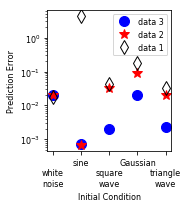

In [7]:
x_vals = np.arange(5)
line_styles = ["ob","*r","dk"]
fill_styles = ['full','full','none']
folder_names = ['Burgers_exp28ss/','Burgers_exp30f/','Burgers_exp32f/']

plt.figure(figsize=(2.7,3))
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.yscale("log")

lines = []
for k in range(3):
    folder_name = folder_names[k]  # Folder to be created for saved output
    pkl_file = folder_name + BestErrorFile(folder_name)
    
    with open(pkl_file, 'rb') as f:
        params = pickle.load(f)
    
    tf.reset_default_graph()
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(params['model_path']+'.meta')
        saver.restore(sess, params['model_path'])
    
        test1_loss = sess.run("loss2:0", feed_dict={"x:0": data_test1_tensor})
        test2_loss = sess.run("loss2:0", feed_dict={"x:0": data_test2_tensor})
        test3_loss = sess.run("loss2:0", feed_dict={"x:0": data_test3_tensor})
        test4_loss = sess.run("loss2:0", feed_dict={"x:0": data_test4_tensor})
        test5_loss = sess.run("loss2:0", feed_dict={"x:0": data_test5_tensor})
        
        
    y_vals = np.array([test1_loss, test2_loss, test3_loss, test4_loss, test5_loss])

    lines += plt.plot(x_vals,y_vals,line_styles[k],fillstyle=fill_styles[k],markersize=10)
    
plt.xticks(x_vals, ['\nwhite\nnoise','sine','\nsquare\nwave','Gaussian','\ntriangle\nwave'])
plt.yticks([10**(-3),10**(-2),10**(-1), 10**(0)])
plt.xlabel("Initial Condition")
plt.ylabel("Prediction Error")
plt.legend(lines,['data 3','data 2','data 1'],fontsize=8)
plt.tight_layout()
plt.show()
    